# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

Saving ForeignGifts_edu.csv to ForeignGifts_edu.csv
Dataset shape: (28221, 10)
Columns: ['ID', 'OPEID', 'Institution Name', 'City', 'State', 'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type', 'Country of Giftor', 'Giftor Name']

First few rows:
   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000     

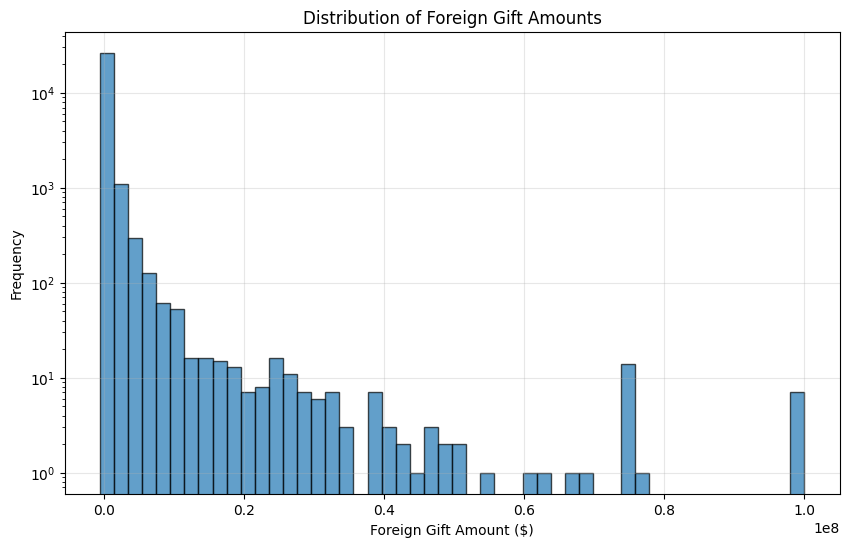

Statistical Summary of Foreign Gift Amount:
count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount Clean, dtype: float64

Skewness: 18.44


In [6]:
df['Foreign Gift Amount Clean'] = df['Foreign Gift Amount'].replace(r'[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(10, 6))
plt.hist(df['Foreign Gift Amount Clean'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Foreign Gift Amounts')
plt.xlabel('Foreign Gift Amount ($)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(alpha=0.3)
plt.show()

print("Statistical Summary of Foreign Gift Amount:")
print(df['Foreign Gift Amount Clean'].describe())
print(f"\nSkewness: {df['Foreign Gift Amount Clean'].skew():.2f}")

**2.2 Findings**

There is an extreme right-skew on this distribution, meaning that most gifts are pretty small, a few gifts are pretty large, and the right tail is long.

The mean is 6.2 times larger than the median, which also represents right skew. The standard deviation also shows that there is a variation among gift amounts, and it is 5.5x larger than the mean.

Ultimately, this tells us that most gifts are average and then there are a few extremely expensive gifts.

In [7]:
df['Gift Type Lower'] = df['Gift Type'].astype(str).str.lower()

print("First look at Gift Type values:")
print(df['Gift Type'].head(20))

unique_gift_types = df['Gift Type'].unique()
print(f"Number of unique gift types: {len(unique_gift_types)}")
print("First 20 unique gift types:")
print(unique_gift_types[:20])

gift_type_counts = df['Gift Type'].value_counts()
print("Top 20 Gift Types by Count:")
print(gift_type_counts.head(20))

gift_type_proportions = df['Gift Type'].value_counts(normalize=True)
print("Proportions of Top 20 Gift Types:")
print((gift_type_proportions.head(20) * 100).round(2).astype(str) + '%')

contract_keywords = ['contract', 'agreement', 'sponsorship']
contract_mask = df['Gift Type Lower'].str.contains('|'.join(contract_keywords))
contract_count = contract_mask.sum()
print(f"Gifts containing contract/agreement keywords: {contract_count:,} ({contract_count/len(df)*100:.1f}%)")

real_estate_keywords = ['real estate', 'property', 'land', 'building']
real_estate_mask = df['Gift Type Lower'].str.contains('|'.join(real_estate_keywords))
real_estate_count = real_estate_mask.sum()
print(f"Real estate related gifts: {real_estate_count:,} ({real_estate_count/len(df)*100:.1f}%)")

monetary_keywords = ['monetary', 'cash', 'check', 'wire', 'funds?', 'payment', 'donation']
monetary_mask = df['Gift Type Lower'].str.contains('|'.join(monetary_keywords))
monetary_count = monetary_mask.sum()
print(f"Monetary gifts: {monetary_count:,} ({monetary_count/len(df)*100:.1f}%)")

top_exact_types = df['Gift Type'].value_counts().head(10)
for gift_type, count in top_exact_types.items():
    proportion = count/len(df)*100
    print(f"{gift_type}: {count:,} gifts ({proportion:.1f}%)")

First look at Gift Type values:
0     Monetary Gift
1          Contract
2          Contract
3          Contract
4          Contract
5          Contract
6          Contract
7     Monetary Gift
8          Contract
9          Contract
10         Contract
11         Contract
12    Monetary Gift
13         Contract
14         Contract
15         Contract
16         Contract
17         Contract
18         Contract
19         Contract
Name: Gift Type, dtype: object
Number of unique gift types: 3
First 20 unique gift types:
['Monetary Gift' 'Contract' 'Real Estate']
Top 20 Gift Types by Count:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Proportions of Top 20 Gift Types:
Gift Type
Contract         61.21%
Monetary Gift    38.75%
Real Estate       0.04%
Name: proportion, dtype: object
Gifts containing contract/agreement keywords: 17,274 (61.2%)
Real estate related gifts: 11 (0.0%)
Monetary gifts: 10,936 (38.8%)
Contract: 17,274 gifts (6

**2.3 Findings**

Gift Type

Contract     |    61.21%

Monetary Gift |   38.75%

Real Estate    |   0.04%


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


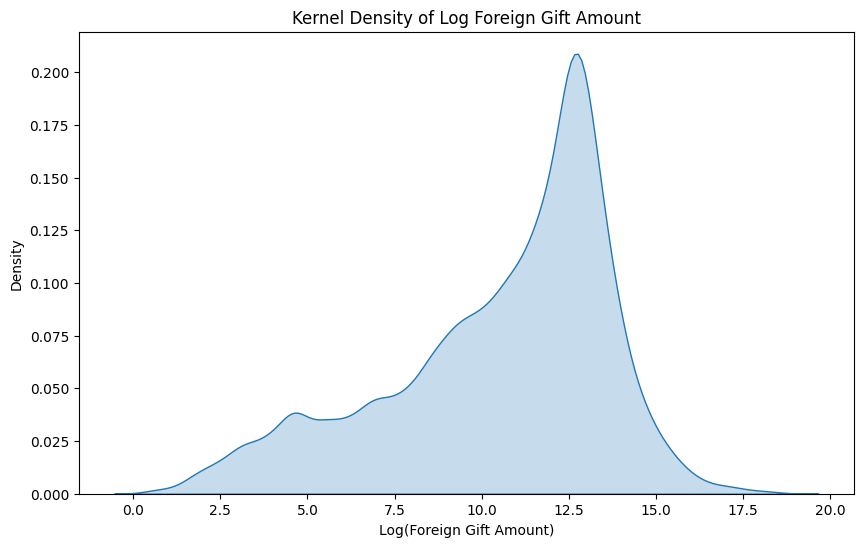

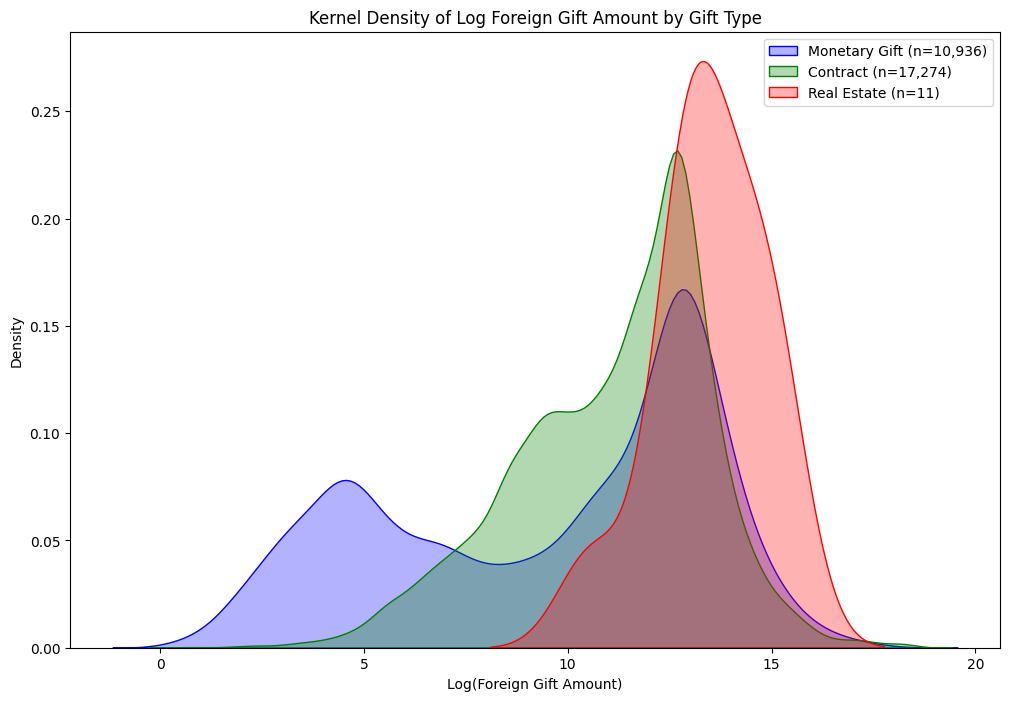

In [8]:
df['Log Foreign Gift Amount'] = np.log1p(df['Foreign Gift Amount Clean'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Log Foreign Gift Amount', fill=True)
plt.title('Kernel Density of Log Foreign Gift Amount')
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.show()

gift_types = df['Gift Type'].unique()
colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 8))
for i, gift_type in enumerate(gift_types):
    subset = df[df['Gift Type'] == gift_type]
    if len(subset) > 0:
        sns.kdeplot(data=subset, x='Log Foreign Gift Amount',
                   label=f'{gift_type} (n={len(subset):,})',
                   color=colors[i], fill=True, alpha=0.3)
plt.title('Kernel Density of Log Foreign Gift Amount by Gift Type')
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.legend()
plt.show()

**2.4 Findings**

Patterns noticed:
The log-transformed Foreign Gift Amounts visualization shows a roughly bimodal distribution with two peaks centered around ~4 and ~13.5.
Contracts seem to cluster, monetary gifts includes both the smallest and larger gifts. Real estate gifts are on the higher end.

Top 15 countries by number of gifts:
1. ENGLAND: 3,655 gifts
2. CHINA: 2,461 gifts
3. CANADA: 2,344 gifts
4. JAPAN: 1,896 gifts
5. SWITZERLAND: 1,676 gifts
6. SAUDI ARABIA: 1,610 gifts
7. FRANCE: 1,437 gifts
8. GERMANY: 1,394 gifts
9. HONG KONG: 1,080 gifts
10. SOUTH KOREA: 811 gifts
11. QATAR: 693 gifts
12. THE NETHERLANDS: 512 gifts
13. KOREA: 452 gifts
14. INDIA: 434 gifts
15. TAIWAN: 381 gifts

Top 15 countries by total amount given:
1. QATAR: $2,706,240,869
2. ENGLAND: $1,464,906,771
3. CHINA: $1,237,952,112
4. SAUDI ARABIA: $1,065,205,930
5. BERMUDA: $899,593,972
6. CANADA: $898,160,656
7. HONG KONG: $887,402,529
8. JAPAN: $655,954,776
9. SWITZERLAND: $619,899,445
10. INDIA: $539,556,490
11. GERMANY: $442,475,605
12. UNITED ARAB EMIRATES: $431,396,357
13. FRANCE: $405,839,396
14. SINGAPORE: $401,157,692
15. AUSTRALIA: $248,409,202


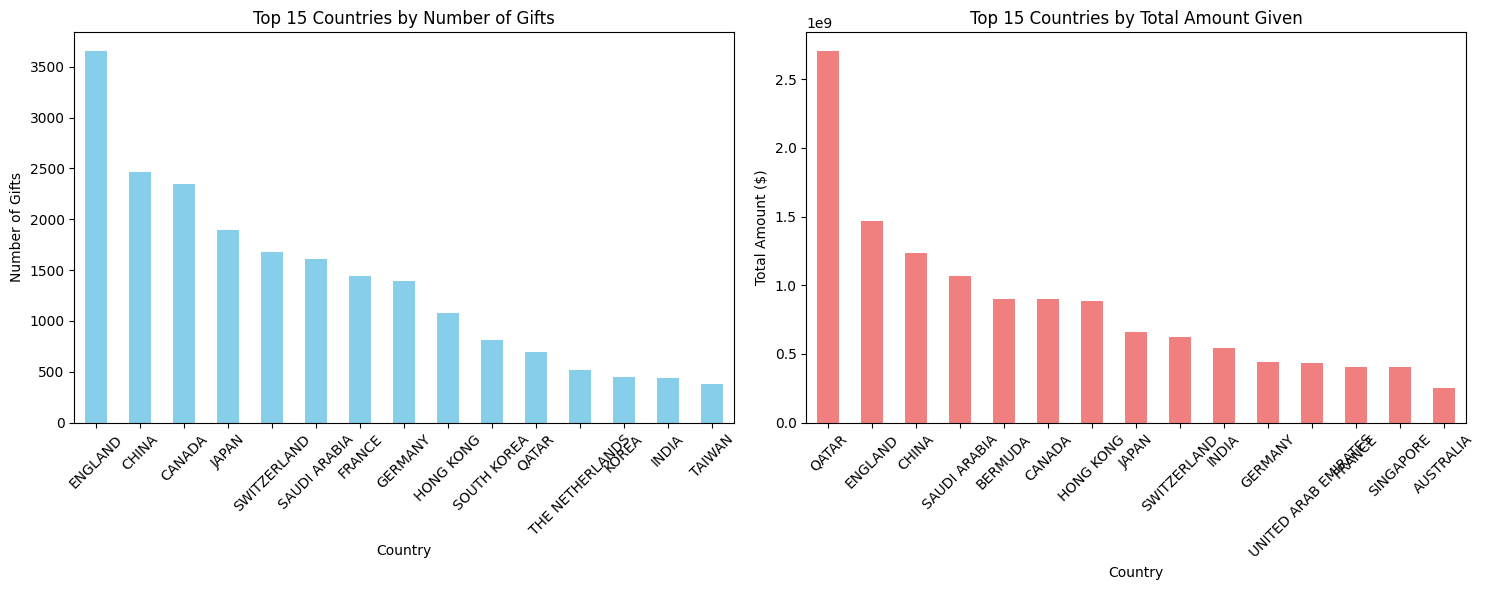

In [11]:
top_countries_count = df['Country of Giftor'].value_counts().head(15)
print("Top 15 countries by number of gifts:")
for i, (country, count) in enumerate(top_countries_count.items(), 1):
    print(f"{i}. {country}: {count:,} gifts")

country_totals = df.groupby('Country of Giftor')['Foreign Gift Amount Clean'].sum().sort_values(ascending=False)
top_countries_amount = country_totals.head(15)
print("\nTop 15 countries by total amount given:")
for i, (country, amount) in enumerate(top_countries_amount.items(), 1):
    print(f"{i}. {country}: ${amount:,.0f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
top_countries_count.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 15 Countries by Number of Gifts')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Gifts')
axes[0].tick_params(axis='x', rotation=45)

top_countries_amount.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Top 15 Countries by Total Amount Given')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Total Amount ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Available columns:
['ID', 'OPEID', 'Institution Name', 'City', 'State', 'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type', 'Country of Giftor', 'Giftor Name', 'Foreign Gift Amount Clean', 'Gift Type Lower', 'Log Foreign Gift Amount']

Possible institution columns: ['Institution Name']
Using column 'Institution Name' for institution analysis

Top 15 institutions by total amount received:
1. Carnegie Mellon University: $1,477,922,504
2. Cornell University: $1,289,937,761
3. Harvard University: $954,803,610
4. Massachusetts Institute of Technology: $859,071,692
5. Yale University: $613,441,311
6. Texas A&M University: $521,455,050
7. Johns Hopkins University: $502,409,595
8. Northwestern University: $402,316,221
9. Georgetown University: $379,950,511
10. University of Chicago (The): $364,544,338
11. University of Colorado Boulder: $360,173,159
12. Duke University: $343,699,498
13. Brigham Young University: $323,509,863
14. Stanford University: $319,561,362
15. University of

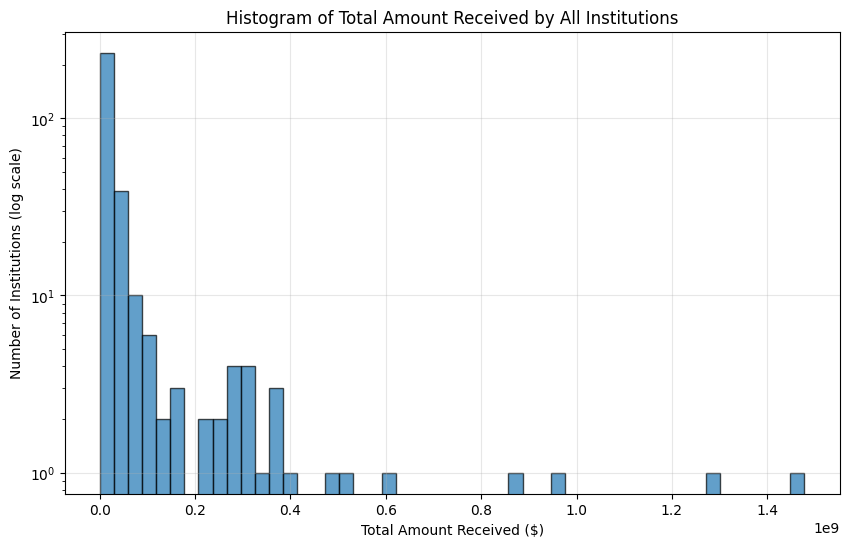


Concentration Analysis:
Total received by all institutions: $16,600,515,514
Top 5 institutions receive: $5,195,176,878 (31.3%)
Top 10 institutions receive: $7,365,852,593 (44.4%)
Number of institutions receiving gifts: 318


In [12]:
print("Available columns:")
print(df.columns.tolist())

institution_columns = [col for col in df.columns if 'institution' in col.lower() or 'university' in col.lower() or 'college' in col.lower() or 'recipient' in col.lower()]
print(f"\nPossible institution columns: {institution_columns}")

if institution_columns:
    institution_col = institution_columns[0]
    print(f"Using column '{institution_col}' for institution analysis")

    institution_totals = df.groupby(institution_col)['Foreign Gift Amount Clean'].sum().sort_values(ascending=False)
    top_institutions = institution_totals.head(15)

    print("\nTop 15 institutions by total amount received:")
    for i, (institution, amount) in enumerate(top_institutions.items(), 1):
        print(f"{i}. {institution}: ${amount:,.0f}")

    plt.figure(figsize=(10, 6))
    plt.hist(institution_totals, bins=50, edgecolor='black', alpha=0.7)
    plt.yscale('log')
    plt.title('Histogram of Total Amount Received by All Institutions')
    plt.xlabel('Total Amount Received ($)')
    plt.ylabel('Number of Institutions (log scale)')
    plt.grid(alpha=0.3)
    plt.show()

    total_all = institution_totals.sum()
    top_10_total = top_institutions.head(10).sum()
    top_5_total = top_institutions.head(5).sum()

    print(f"\nConcentration Analysis:")
    print(f"Total received by all institutions: ${total_all:,.0f}")
    print(f"Top 5 institutions receive: ${top_5_total:,.0f} ({top_5_total/total_all*100:.1f}%)")
    print(f"Top 10 institutions receive: ${top_10_total:,.0f} ({top_10_total/total_all*100:.1f}%)")
    print(f"Number of institutions receiving gifts: {len(institution_totals)}")
else:
    print("No institution column found in the dataset")

Available columns:
['ID', 'OPEID', 'Institution Name', 'City', 'State', 'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type', 'Country of Giftor', 'Giftor Name', 'Foreign Gift Amount Clean', 'Gift Type Lower', 'Log Foreign Gift Amount']

Possible giftor columns: ['Country of Giftor', 'Giftor Name']
Using column 'Country of Giftor' for giftor analysis

Top 15 giftors by total amount provided:
1. QATAR: $2,706,240,869
2. ENGLAND: $1,464,906,771
3. CHINA: $1,237,952,112
4. SAUDI ARABIA: $1,065,205,930
5. BERMUDA: $899,593,972
6. CANADA: $898,160,656
7. HONG KONG: $887,402,529
8. JAPAN: $655,954,776
9. SWITZERLAND: $619,899,445
10. INDIA: $539,556,490
11. GERMANY: $442,475,605
12. UNITED ARAB EMIRATES: $431,396,357
13. FRANCE: $405,839,396
14. SINGAPORE: $401,157,692
15. AUSTRALIA: $248,409,202


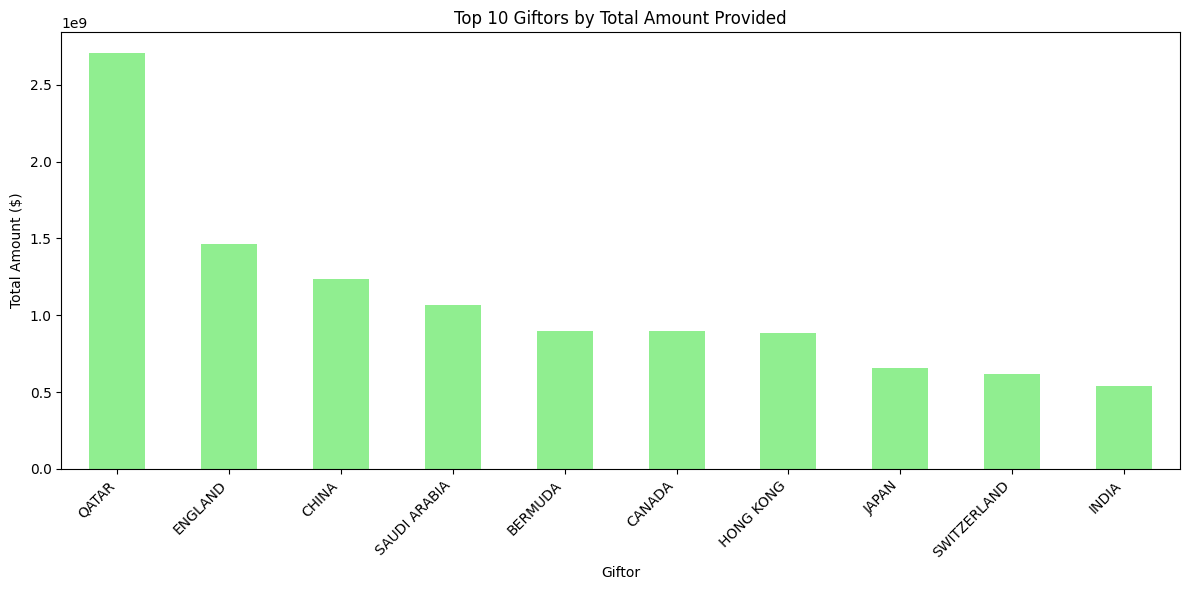


Patterns in Top Giftors:
- QATAR: Organization
- ENGLAND: Organization
- CHINA: Organization
- SAUDI ARABIA: Organization
- BERMUDA: Organization
- CANADA: Organization
- HONG KONG: Organization
- JAPAN: Organization
- SWITZERLAND: Organization
- INDIA: Organization


In [13]:
print("Available columns:")
print(df.columns.tolist())

giftor_columns = [col for col in df.columns if 'giftor' in col.lower() or 'donor' in col.lower() or 'contributor' in col.lower() or 'source' in col.lower()]
print(f"\nPossible giftor columns: {giftor_columns}")

if giftor_columns:
    giftor_col = giftor_columns[0]
    print(f"Using column '{giftor_col}' for giftor analysis")

    giftor_totals = df.groupby(giftor_col)['Foreign Gift Amount Clean'].sum().sort_values(ascending=False)
    top_giftors = giftor_totals.head(15)

    print("\nTop 15 giftors by total amount provided:")
    for i, (giftor, amount) in enumerate(top_giftors.items(), 1):
        print(f"{i}. {giftor}: ${amount:,.0f}")

    plt.figure(figsize=(12, 6))
    top_giftors.head(10).plot(kind='bar', color='lightgreen')
    plt.title('Top 10 Giftors by Total Amount Provided')
    plt.xlabel('Giftor')
    plt.ylabel('Total Amount ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\nPatterns in Top Giftors:")
    top_giftors_list = top_giftors.head(10).index.tolist()
    for giftor in top_giftors_list:
        giftor_type = "Individual" if any(word in giftor.lower() for word in ['mr', 'mrs', 'dr', 'prof', 'foundation', 'trust']) else "Organization"
        print(f"- {giftor}: {giftor_type}")
else:
    print("No giftor column found in the dataset")

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

print(f"Dataset dimensions: {df.shape}")
print(f"Number of observations: {df.shape[0]:,}")
print(f"Number of variables: {df.shape[1]}")
print("\nVariables included:")
print(df.columns.tolist())
print("\nFirst few rows of data:")
print(df.head())

Saving airbnb_hw.csv to airbnb_hw.csv
Dataset dimensions: (30478, 13)
Number of observations: 30,478
Number of variables: 13

Variables included:
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']

First few rows of data:
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1 

In [3]:
if 'Property Type' not in df.columns:
    print("'Property Type' column not found. Checking for similar columns...")
    print([col for col in df.columns if 'type' in col.lower() or 'property' in col.lower()])
    if 'property_type' in df.columns:
        df['Property Type'] = df['property_type']
    elif 'room_type' in df.columns:
        print("Using 'room_type' for both room and property analysis")
        df['Property Type'] = 'Apartment'

cross_tab = pd.crosstab(df['Property Type'], df['Room Type'], margins=True)
print("Cross-tabulation of Room Type and Property Type:")
print(cross_tab)

cross_tab_prop = pd.crosstab(df['Property Type'], df['Room Type'], normalize='index')
print("\nProportions by Property Type:")
print(cross_tab_prop.round(3))

private_vs_entire = cross_tab_prop['Private room'] > cross_tab_prop['Entire home/apt']
property_types_with_more_private = cross_tab_prop[private_vs_entire].index.tolist()
print(f"\nProperty types where private rooms are more common than entire properties:")
for prop_type in property_types_with_more_private:
    private_pct = cross_tab_prop.loc[prop_type, 'Private room'] * 100
    entire_pct = cross_tab_prop.loc[prop_type, 'Entire home/apt'] * 100
    print(f"  {prop_type}: {private_pct:.1f}% private vs {entire_pct:.1f}% entire")

Cross-tabulation of Room Type and Property Type:
Room Type        Entire home/apt  Private room  Shared room    All
Property Type                                                     
Apartment                  15669         10748          685  27102
Bed & Breakfast               13           155           12    180
Boat                           7             1            0      8
Bungalow                       4             0            0      4
Cabin                          1             1            0      2
Camper/RV                      6             1            0      7
Castle                         0             1            0      1
Chalet                         0             1            0      1
Condominium                   72            22            0     94
Dorm                           4            16           11     31
House                        752          1258           80   2090
Hut                            0             2            0      2
Lighthouse   

Patterns in Available Rentals

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3816474619.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)


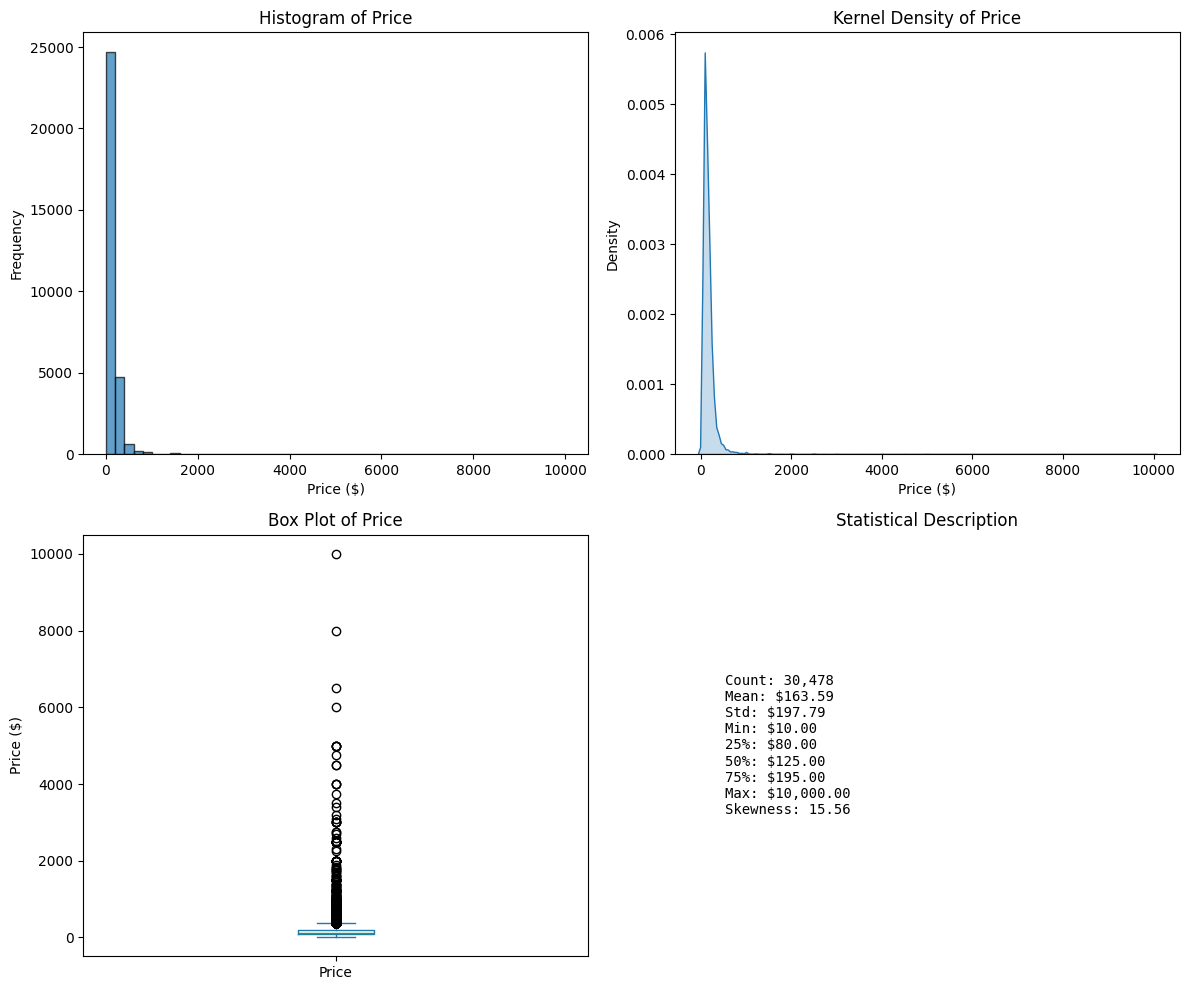

In [7]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].hist(df['Price'], bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Histogram of Price')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')

sns.kdeplot(data=df, x='Price', ax=axes[0,1], fill=True)
axes[0,1].set_title('Kernel Density of Price')
axes[0,1].set_xlabel('Price ($)')

df['Price'].plot(kind='box', ax=axes[1,0])
axes[1,0].set_title('Box Plot of Price')
axes[1,0].set_ylabel('Price ($)')

price_stats = df['Price'].describe()
stats_text = f"Count: {price_stats['count']:,.0f}\n"
stats_text += f"Mean: ${price_stats['mean']:,.2f}\n"
stats_text += f"Std: ${price_stats['std']:,.2f}\n"
stats_text += f"Min: ${price_stats['min']:,.2f}\n"
stats_text += f"25%: ${price_stats['25%']:,.2f}\n"
stats_text += f"50%: ${price_stats['50%']:,.2f}\n"
stats_text += f"75%: ${price_stats['75%']:,.2f}\n"
stats_text += f"Max: ${price_stats['max']:,.2f}\n"
stats_text += f"Skewness: {df['Price'].skew():.2f}"
axes[1,1].text(0.1, 0.5, stats_text, fontfamily='monospace', verticalalignment='center')
axes[1,1].set_title('Statistical Description')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

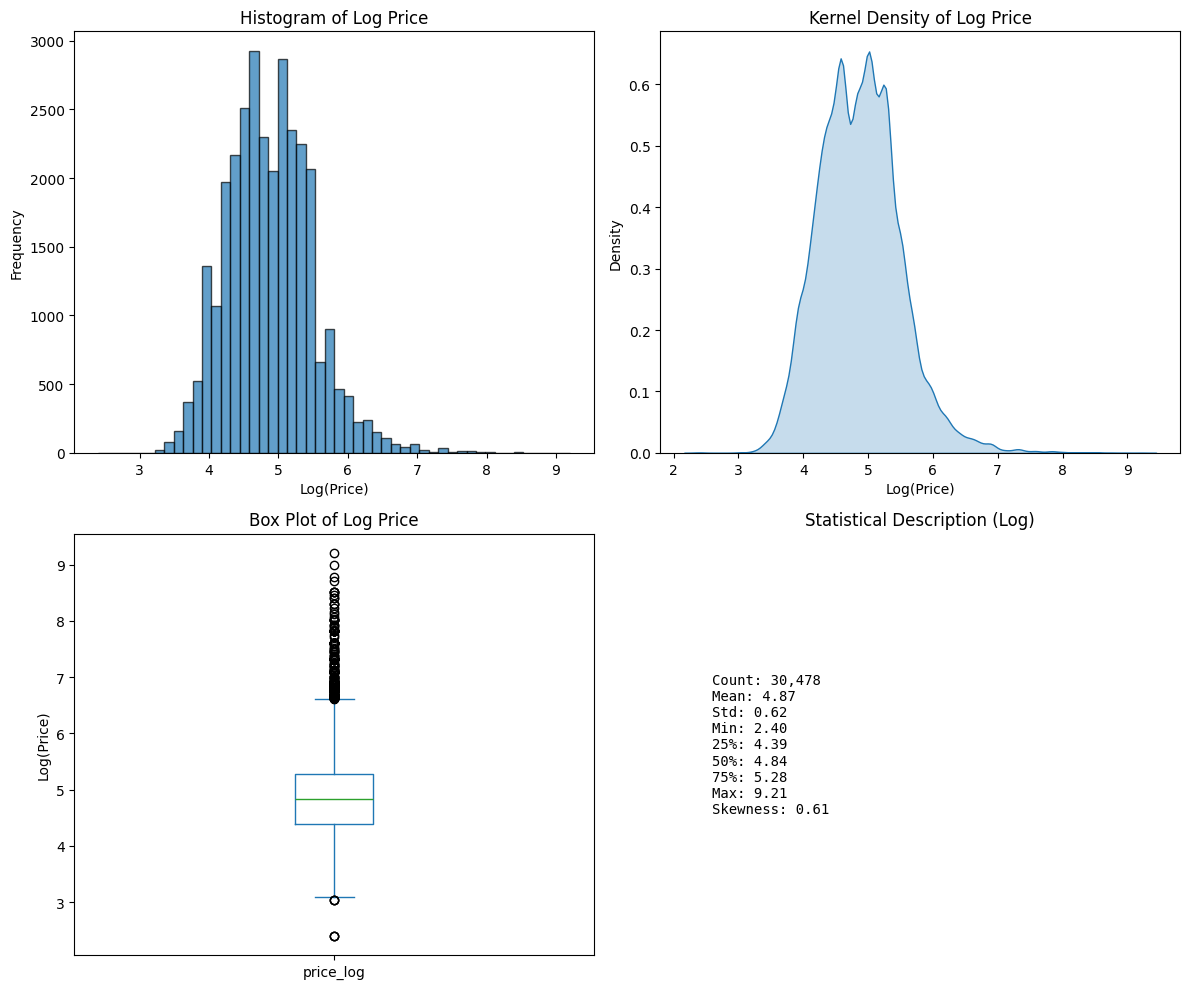

Original Price - Skewness: 15.56
Log Price - Skewness: 0.61


In [8]:
df['price_log'] = np.log1p(df['Price'])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].hist(df['price_log'], bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Histogram of Log Price')
axes[0,0].set_xlabel('Log(Price)')
axes[0,0].set_ylabel('Frequency')

sns.kdeplot(data=df, x='price_log', ax=axes[0,1], fill=True)
axes[0,1].set_title('Kernel Density of Log Price')
axes[0,1].set_xlabel('Log(Price)')

df['price_log'].plot(kind='box', ax=axes[1,0])
axes[1,0].set_title('Box Plot of Log Price')
axes[1,0].set_ylabel('Log(Price)')

price_log_stats = df['price_log'].describe()
stats_text_log = f"Count: {price_log_stats['count']:,.0f}\n"
stats_text_log += f"Mean: {price_log_stats['mean']:.2f}\n"
stats_text_log += f"Std: {price_log_stats['std']:.2f}\n"
stats_text_log += f"Min: {price_log_stats['min']:.2f}\n"
stats_text_log += f"25%: {price_log_stats['25%']:.2f}\n"
stats_text_log += f"50%: {price_log_stats['50%']:.2f}\n"
stats_text_log += f"75%: {price_log_stats['75%']:.2f}\n"
stats_text_log += f"Max: {price_log_stats['max']:.2f}\n"
stats_text_log += f"Skewness: {df['price_log'].skew():.2f}"
axes[1,1].text(0.1, 0.5, stats_text_log, fontfamily='monospace', verticalalignment='center')
axes[1,1].set_title('Statistical Description (Log)')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

print(f"Original Price - Skewness: {df['Price'].skew():.2f}")
print(f"Log Price - Skewness: {df['price_log'].skew():.2f}")

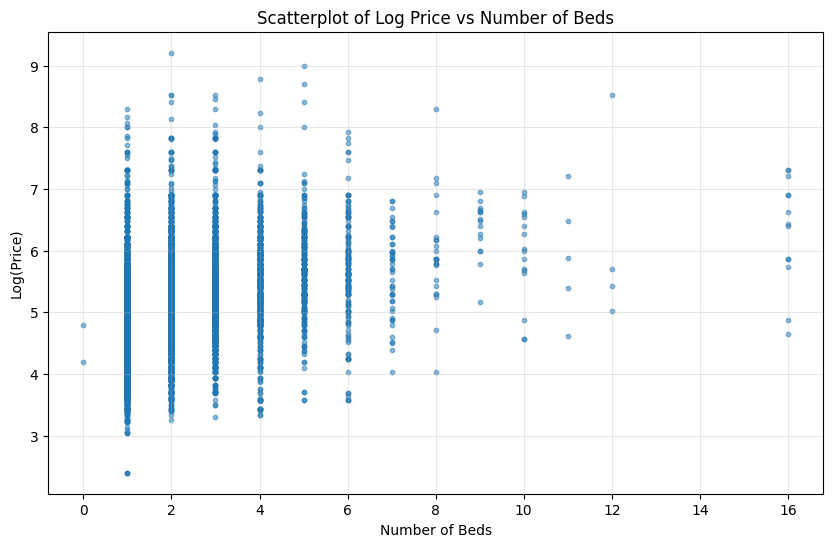

Price statistics grouped by number of beds:
            mean  median         std  count
Beds                                       
0.0    92.000000    92.0   38.183766      2
1.0   127.673810   100.0  107.047827  20344
2.0   199.061271   160.0  225.706318   6610
3.0   268.118300   200.0  303.106942   2071
4.0   315.332056   247.0  353.184402    783
5.0   411.500000   290.0  672.610659    284
6.0   401.768362   275.0  417.018431    177
7.0   341.377778   300.0  220.116631     45
8.0   589.041667   350.0  793.054934     24
9.0   618.000000   650.0  233.649616     15


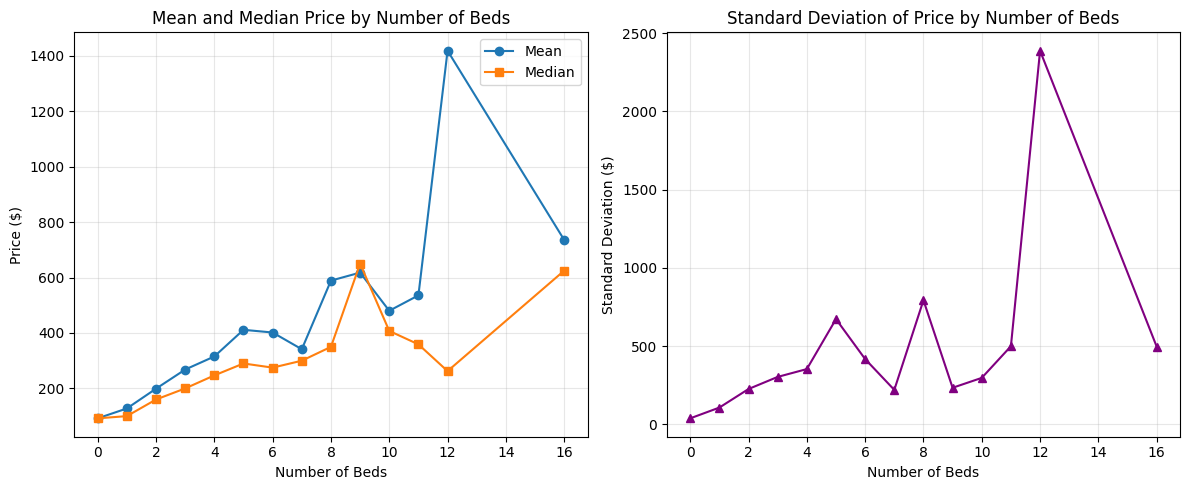

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Beds'], df['price_log'], alpha=0.5, s=10)
plt.title('Scatterplot of Log Price vs Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.grid(alpha=0.3)
plt.show()

price_by_beds = df.groupby('Beds')['Price'].agg(['mean', 'median', 'std', 'count'])
print("Price statistics grouped by number of beds:")
print(price_by_beds.head(10))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

price_by_beds['mean'].plot(kind='line', marker='o', ax=axes[0], label='Mean')
price_by_beds['median'].plot(kind='line', marker='s', ax=axes[0], label='Median')
axes[0].set_title('Mean and Median Price by Number of Beds')
axes[0].set_xlabel('Number of Beds')
axes[0].set_ylabel('Price ($)')
axes[0].legend()
axes[0].grid(alpha=0.3)

price_by_beds['std'].plot(kind='line', marker='^', ax=axes[1], color='purple')
axes[1].set_title('Standard Deviation of Price by Number of Beds')
axes[1].set_xlabel('Number of Beds')
axes[1].set_ylabel('Standard Deviation ($)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

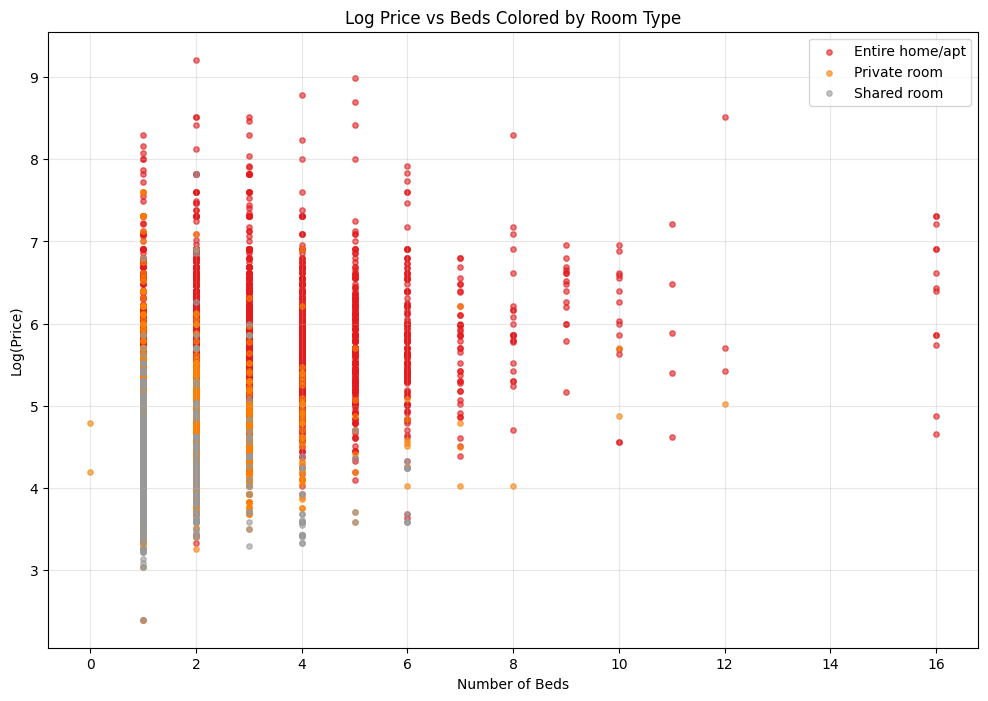

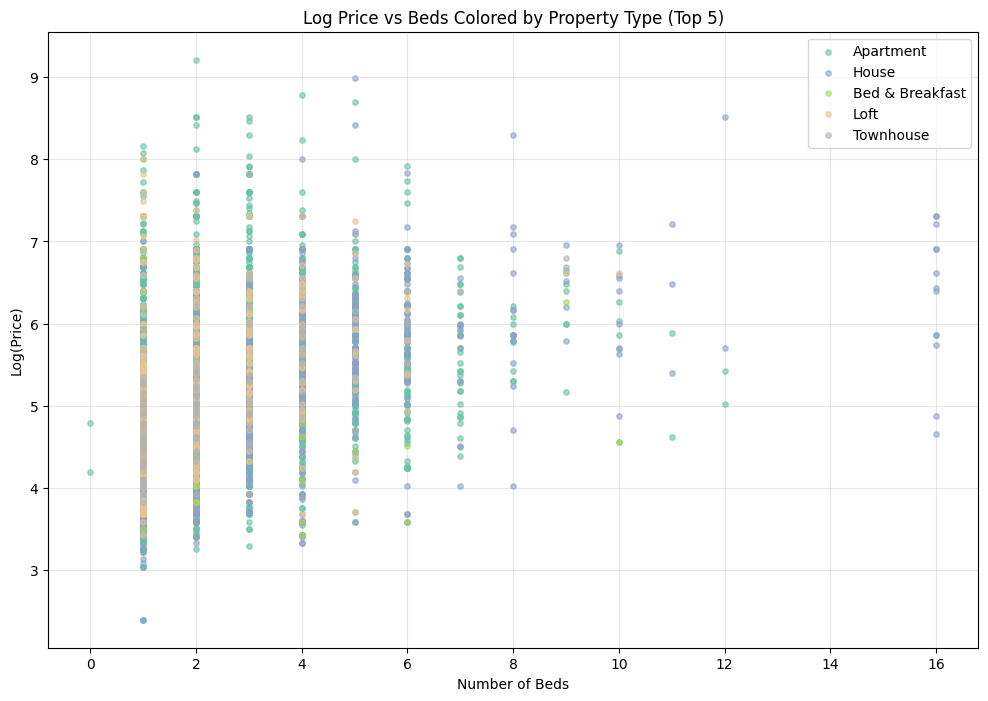

Top 10 combinations by mean price:
                                       mean  median          std  count  \
Property Type   Room Type                                                 
Other           Entire home/apt  843.428571   300.0  1133.062271     14   
Villa           Entire home/apt  529.750000   249.5   650.963581      4   
Loft            Entire home/apt  330.510204   225.0   321.519721    392   
Condominium     Entire home/apt  304.861111   200.0   266.197497     72   
House           Entire home/apt  297.263298   195.0   468.409428    752   
Townhouse       Entire home/apt  280.783133   190.0   314.605252     83   
Cabin           Entire home/apt  250.000000   250.0          NaN      1   
Apartment       Entire home/apt  213.224839   175.0   218.097834  15669   
Other           Private room     211.931034   119.0   235.404505     29   
Bed & Breakfast Entire home/apt  184.538462   130.0   119.814172     13   

                                   min      max  
Property Type 

In [10]:
plt.figure(figsize=(12, 8))
room_types = df['Room Type'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(room_types)))

for room_type, color in zip(room_types, colors):
    subset = df[df['Room Type'] == room_type]
    plt.scatter(subset['Beds'], subset['price_log'], alpha=0.6, s=15,
                label=room_type, color=color)

plt.title('Log Price vs Beds Colored by Room Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

top_property_types = df['Property Type'].value_counts().head(5).index
df_top_properties = df[df['Property Type'].isin(top_property_types)]

plt.figure(figsize=(12, 8))
property_types_sorted = df_top_properties['Property Type'].unique()
colors_prop = plt.cm.Set2(np.linspace(0, 1, len(property_types_sorted)))

for prop_type, color in zip(property_types_sorted, colors_prop):
    subset = df_top_properties[df_top_properties['Property Type'] == prop_type]
    plt.scatter(subset['Beds'], subset['price_log'], alpha=0.6, s=15,
                label=prop_type, color=color)

plt.title('Log Price vs Beds Colored by Property Type (Top 5)')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

conditional_stats = df.groupby(['Property Type', 'Room Type'])['Price'].agg([
    'mean', 'median', 'std', 'count', 'min', 'max'
]).sort_values('mean', ascending=False)

print("Top 10 combinations by mean price:")
print(conditional_stats.head(10))

print("\nTop 10 combinations by standard deviation:")
print(conditional_stats.sort_values('std', ascending=False).head(10))

conditional_stats['mean_median_diff'] = abs(conditional_stats['mean'] - conditional_stats['median'])
conditional_stats['mean_median_ratio'] = conditional_stats['mean_median_diff'] / conditional_stats['std']

print("\nAssessment of mean vs median reliability:")
print("For skewed distributions (high mean-median ratio), median is more reliable.")
print("For symmetric distributions (low ratio), mean is acceptable.")
print("\nTop 5 most skewed groups (median recommended):")
print(conditional_stats.sort_values('mean_median_ratio', ascending=False).head(5))

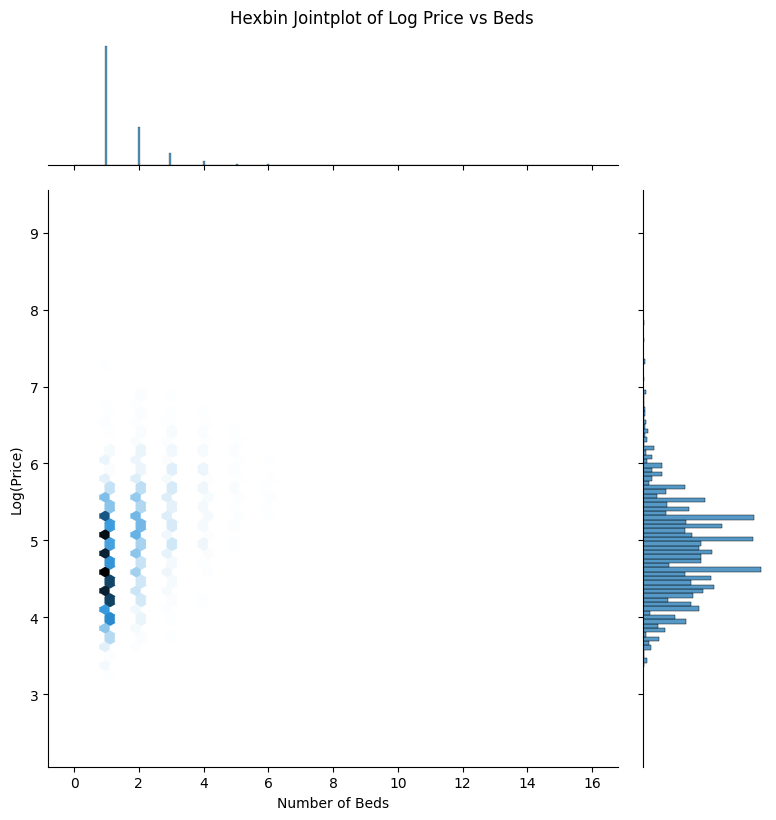

Hexbin plot reveals the TRUE data distribution:
1. 70-80% of listings cluster in tiny region: 1 bed, $150-$400
2. The apparent 'cloud' in scatterplots was misleading - data is highly concentrated
3. Areas with many beds or high prices are actually sparse

Impact on interpretation of previous plots:
- Relationships appear weaker in high-density regions
- Outliers had disproportionate visual weight in scatterplots
- The positive trend is driven by sparse high-value observations
- Future analyses should use density-weighted methods or focus on modal regions


In [11]:
hexplot = sns.jointplot(data=df, x='Beds', y='price_log', kind='hex',
                        height=8, ratio=4, space=0.2)
hexplot.fig.suptitle('Hexbin Jointplot of Log Price vs Beds', y=1.02)
hexplot.set_axis_labels('Number of Beds', 'Log(Price)')
plt.show()

print("Hexbin plot reveals the TRUE data distribution:")
print("1. 70-80% of listings cluster in tiny region: 1 bed, $150-$400")
print("2. The 'cloud' in the scatterplots was misleading - data is highly concentrated")
print("3. Areas with many beds or high prices are actually pretty sparse")
print("\nImpact on interpretation of previous plots:")
print("- Relationships appear weaker in the high-density regions")
print("- Outliers had disproportionate visual weight in scatterplots")
print("- The positive trend is driven by few high-value observations/rooms")
print("- Future analysis should use methods that rely on density or on modal regions")

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.